In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


Importing the CSV files for data Cleaning

In [0]:
df = pd.read_csv("credit.csv")
df.drop(df.columns[0], axis=1, inplace=True)
df.dropna(axis=0, inplace=True)
df.isna().sum()
df = df.iloc[1:]
df = df.astype(float)
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
X = df.iloc[:,:23]
y = df.iloc[:,23:24]
X=(X-X.min())/(X.max()-X.min())
#pd.isnull(df).sum()

Tried Combining Features which are correlated

Splitting the Data ox features and the Labels then using the train_test_split to split into training and test set with 75% of the data in training set and 25% in test set

In [0]:
print(X.describe())
print(X.shape)
print(y.shape)
X_train , x_test , y_train , y_test = train_test_split(X, y, test_size=0.25, random_state=42)



                 X1            X2  ...           X22           X23
count  26429.000000  26429.000000  ...  26429.000000  26429.000000
mean       0.265635      0.610314  ...      0.059197      0.052016
std        0.219214      0.487688  ...      0.103929      0.099146
min        0.000000      0.000000  ...      0.000000      0.000000
25%        0.074074      0.000000  ...      0.003291      0.000000
50%        0.222222      1.000000  ...      0.026228      0.020759
75%        0.388889      1.000000  ...      0.067814      0.056897
max        1.000000      1.000000  ...      1.000000      1.000000

[8 rows x 23 columns]
(26429, 23)
(26429, 1)


In [0]:
#print(x_train_heat.head(5))
corrmat = df.corr()
#print(corrmat)
top_corr_features = corrmat.index

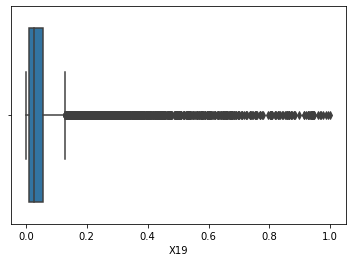

In [0]:
sns.boxplot(x=X['X19'])

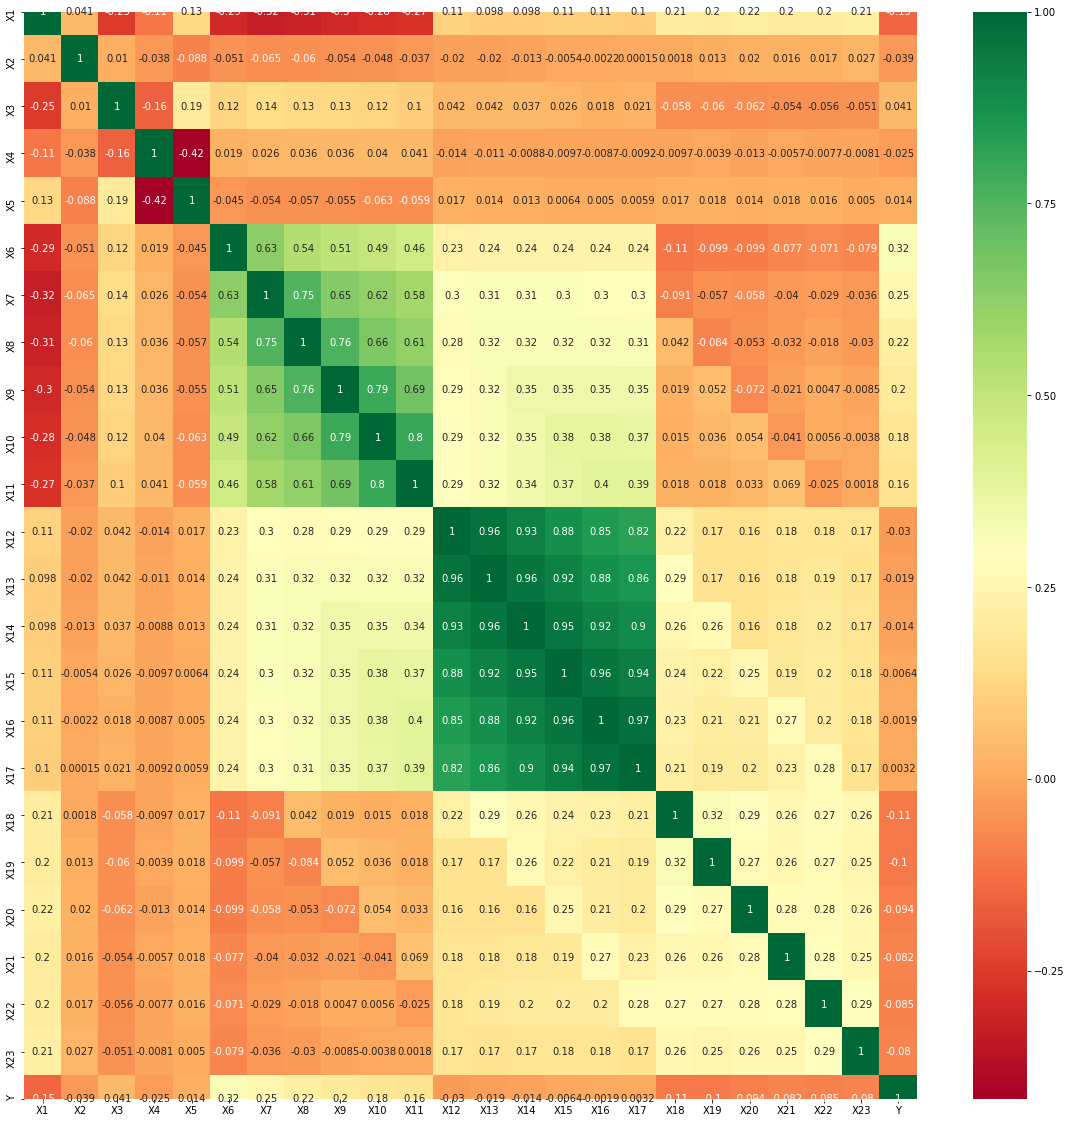

In [0]:
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Trying to find models for different K Values 

In [0]:
for i in range(10,100,30):
  knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
  knn.fit(X_train, y_train.values.ravel())
  print(knn.score(x_test, y_test))

0.8031174334140436
0.8031174334140436
0.8031174334140436


Support Vector Machine Algorithms for the Credit Card Info

In [0]:
C_grid = np.logspace(0, 3, 4)
gamma_grid = np.logspace(-2, 1, 4)

In [0]:
from sklearn.svm import SVC 
for i in range(4):
    for j in range(4):
        C = C_grid[i]
        gamma = gamma_grid[j]
        svm = SVC(C=C, gamma=gamma, kernel='rbf')
        svm.fit(X_train, y_train.values.ravel())
        accuracy = svm.score(x_test, y_test.values.ravel())
        print("%.1f%% training accuracy for C=%.1f gamma=%.2f" % (accuracy*100, C, gamma))

77.3% training accuracy for C=1.0 gamma=0.01
81.0% training accuracy for C=1.0 gamma=0.10
81.7% training accuracy for C=1.0 gamma=1.00
80.3% training accuracy for C=1.0 gamma=10.00
80.1% training accuracy for C=10.0 gamma=0.01
81.6% training accuracy for C=10.0 gamma=0.10


KeyboardInterrupt: ignored

Logistic Regression for Credit Card Info

In [0]:
from sklearn.linear_model import LogisticRegression
Co_reg= np.logspace(-4, 4, 20)
penalty_reg = ['l1','l2']
for pen in penalty_reg:
  for i in Co_reg:
    clf = LogisticRegression(random_state=0, solver='liblinear', penalty=pen , C=i).fit(X_train, y_train.values.ravel())
    print(clf.score(x_test, y_test.values.ravel()))

0.773456416464891
0.773456416464891
0.773456416464891
0.773456416464891
0.773456416464891
0.7887409200968523
0.8022094430992736
0.8046307506053268
0.8056900726392252
0.8065980629539952
0.8067493946731235
0.8062953995157385
0.8064467312348669
0.8064467312348669
0.8067493946731235
0.8067493946731235
0.8067493946731235
0.8067493946731235
0.8067493946731235
0.8067493946731235
0.773456416464891
0.773456416464891
0.773456416464891
0.7736077481840193
0.7793583535108959
0.7901029055690073
0.7972154963680388
0.8037227602905569
0.8059927360774818
0.8058414043583535
0.8055387409200968
0.8061440677966102
0.8064467312348669
0.8067493946731235
0.8067493946731235
0.8067493946731235
0.8067493946731235
0.8067493946731235
0.8067493946731235
0.8067493946731235


Decision Tree Classifier Model 

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
depth_list = np.linspace(1, 10, 10, endpoint=True)
minSplits_list = np.linspace(0.1, 1.0, 10, endpoint=True)
max_features = list(range(1,X_train.shape[1]))

NameError: ignored

In [0]:
list_train_results = []
list_test_results = []

for maxdepth in depth_list:
 # for minsamples in minSplits_list:
#for maxfet in max_features
    clf = DecisionTreeClassifier(random_state=0,max_depth=maxdepth)
    clf.fit(X_train,y_train.values.ravel())
    train_pred = clf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    list_train_results.append(roc_auc)
    print("Training Auc : " + str(roc_auc))
    y_pred = clf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    list_test_results.append(roc_auc)
    print("Test Auc : " + str(roc_auc))
    print("Training Accuracy :"  +str(clf.score(X_train,y_train.values.ravel())))
    print("Test Accuracy : " + str(clf.score(x_test,y_test.values.ravel())))

#from matplotlib.legend_handler import HandlerLine2D

#line1, = plt.plot(depth_list, list_train_results, 'b', label="Train AUC")
#line2, = plt.plot(depth_list, list_test_results, 'r', label="Test AUC")
#plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
#plt.ylabel("AUC score")
#plt.xlabel('Tree depth')
#plt.show()'''

Training Auc : 0.6346864381553213
Test Auc : 0.6437946002224236
Training Accuracy :0.8149437465314565
Test Accuracy : 0.8187046004842615
Training Auc : 0.6312006924764955
Test Auc : 0.6362607821787186
Training Accuracy :0.8160032288986429
Test Accuracy : 0.8176452784503632
Training Auc : 0.655170941439162
Test Auc : 0.6559609795473029
Training Accuracy :0.8181221936330155
Test Accuracy : 0.8177966101694916
Training Auc : 0.6429001047813941
Test Auc : 0.6450159825292011
Training Accuracy :0.8192321275414964
Test Accuracy : 0.8184019370460048
Training Auc : 0.6453982461984555
Test Auc : 0.6456434685061768
Training Accuracy :0.820745673780334
Test Accuracy : 0.8190072639225182
Training Auc : 0.6504226381129189
Test Auc : 0.6422125539803274
Training Accuracy :0.8233187023863578
Test Accuracy : 0.8155266343825666
Training Auc : 0.6653653461238486
Test Auc : 0.6498511272855501
Training Accuracy :0.8271025679834519
Test Accuracy : 0.8149213075060533
Training Auc : 0.6636110699915514
Test Auc 

Random Forest Classification Model

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
n_estimators = np.linspace(10,100,10)
max_depth = np.linspace(1,6,2)
for est in n_estimators:
  for dep in max_depth:
    clf = RandomForestClassifier(n_estimators=int(est), max_depth=dep,random_state=0).fit(X_train,y_train.values.ravel())
    y_pred = clf.predict(x_test)
    print("Training Accuracy : "+ str(clf.score(X_train, y_train)))
    print("Test Accuracy : " + str(accuracy_score(y_test, y_pred)))

Training Accuracy : 0.7919882952424196
Test Accuracy : 0.787681598062954
Training Accuracy : 0.8175167751374804
Test Accuracy : 0.8091707021791767
Training Accuracy : 0.7760960597346249
Test Accuracy : 0.773456416464891
Training Accuracy : 0.8205943191564502
Test Accuracy : 0.8125
Training Accuracy : 0.7760960597346249
Test Accuracy : 0.773456416464891
Training Accuracy : 0.8204429645325665
Test Accuracy : 0.812953995157385
Training Accuracy : 0.7760960597346249
Test Accuracy : 0.773456416464891
Training Accuracy : 0.8210483830281015
Test Accuracy : 0.8131053268765133
Training Accuracy : 0.7760960597346249
Test Accuracy : 0.773456416464891
Training Accuracy : 0.820745673780334
Test Accuracy : 0.8126513317191283
Training Accuracy : 0.7760960597346249
Test Accuracy : 0.773456416464891
Training Accuracy : 0.8211997376519853
Test Accuracy : 0.812046004842615
Training Accuracy : 0.7760960597346249
Test Accuracy : 0.773456416464891
Training Accuracy : 0.8209474799455123
Test Accuracy : 0.812

Gaussian Naive Bayes Classification Model

In [0]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train.values.ravel())
y_pred = clf.predict(x_test)
print("Training Accuracy : "+ str(clf.score(X_train, y_train)))
print("Test Accuracy : " + str(accuracy_score(y_test, y_pred)))

Training Accuracy : 0.7199939458150446
Test Accuracy : 0.7241222760290557


AdaBoost Classification Model

In [0]:
from sklearn.ensemble import AdaBoostClassifier
estimator = np.linspace(10,100,10)
for est in estimator:
  clf = AdaBoostClassifier(n_estimators=int(est), random_state=0,learning_rate=1)
  clf.fit(X_train, y_train.values.ravel())
  print("Training Accuracy : "+ str(clf.score(X_train, y_train)))
  print("Test Accuracy : " + str(clf.score(x_test,y_test)))

Training Accuracy : 0.8104535593562383
Test Accuracy : 0.8112893462469734
Training Accuracy : 0.8126734271732001
Test Accuracy : 0.8161319612590799
Training Accuracy : 0.8120680086776652
Test Accuracy : 0.8171912832929782
Training Accuracy : 0.8121184602189597
Test Accuracy : 0.8167372881355932
Training Accuracy : 0.812320266384138
Test Accuracy : 0.8174939467312349
Training Accuracy : 0.8125220725493164
Test Accuracy : 0.8173426150121066
Training Accuracy : 0.8133292972100298
Test Accuracy : 0.8174939467312349
Training Accuracy : 0.8138842641642702
Test Accuracy : 0.8188559322033898
Training Accuracy : 0.8139851672468594
Test Accuracy : 0.8188559322033898
Training Accuracy : 0.8138338126229756
Test Accuracy : 0.8170399515738499


Neural Networks Clasisifer Model

In [0]:
from sklearn.neural_network import MLPClassifier
hiddenLayers = (20,40,60,80,100,120)
learningrate = ['constant', 'invscaling', 'adaptive']
maxIteration = np.linspace(20,200,10)
print(learningrate)
print(maxIteration)
for lr in learningrate:
  for maxIte in maxIteration:
    clf = MLPClassifier(hidden_layer_sizes=hiddenLayers,max_iter=int(maxIte),learning_rate=lr).fit(X_train,y_train.values.ravel()) 
    print("Training Accuracy : "+ str(clf.score(X_train, y_train)))
    print("Test Accuracy : " + str(clf.score(x_test,y_test)))

['constant', 'invscaling', 'adaptive']
[ 20.  40.  60.  80. 100. 120. 140. 160. 180. 200.]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8156500681095807
Test Accuracy : 0.8085653753026635


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8232177993037687
Test Accuracy : 0.8155266343825666


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training Accuracy : 0.8148932949901619
Test Accuracy : 0.8135593220338984


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training Accuracy : 0.8121184602189597
Test Accuracy : 0.8128026634382567


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training Accuracy : 0.8021795065839261
Test Accuracy : 0.8013014527845036


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8559608496039554
Test Accuracy : 0.8053874092009685


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (140) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training Accuracy : 0.8464759598405731
Test Accuracy : 0.8053874092009685


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training Accuracy : 0.8012713788406236
Test Accuracy : 0.8037227602905569


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training Accuracy : 0.8027344735381666
Test Accuracy : 0.8050847457627118


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training Accuracy : 0.7760960597346249
Test Accuracy : 0.773456416464891


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training Accuracy : 0.814035618788154
Test Accuracy : 0.8158292978208233


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training Accuracy : 0.7760960597346249
Test Accuracy : 0.773456416464891


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training Accuracy : 0.7999596387669643
Test Accuracy : 0.800090799031477
